# 🔹Match-Level Insights

### Average runs scored per match


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
deliveries=pd.read_csv("R:\projects\IPL-DATA-ANALYSIS\Data\deliveries.csv",usecols=["batting_team","total_runs"])

In [4]:
deliveries.isnull().sum()

batting_team    0
total_runs      0
dtype: int64

In [5]:
deliveries=deliveries.replace({"Rising Pune Supergiant":"Rising Pune Supergiants"})

In [6]:
deliveries=deliveries.groupby("batting_team")["total_runs"].sum().reset_index(name="total_run") 

In [7]:
deliveries

,batting_team,total_run
0,Chennai Super Kings,26418
1,Deccan Chargers,11463
2,Delhi Capitals,2630
3,Delhi Daredevils,24388
4,Gujarat Lions,4862
5,Kings XI Punjab,27893
6,Kochi Tuskers Kerala,1901
7,Kolkata Knight Riders,27419
8,Mumbai Indians,29809
9,Pune Warriors,6358


In [8]:
total_match=pd.read_csv("R:\projects\IPL-DATA-ANALYSIS\Data\matches.csv",usecols=["team1","team2"])

In [9]:
total_match

,team1,team2
0,Sunrisers Hyderabad,Royal Challengers Bangalore
1,Mumbai Indians,Rising Pune Supergiant
2,Gujarat Lions,Kolkata Knight Riders
3,Rising Pune Supergiant,Kings XI Punjab
4,Royal Challengers Bangalore,Delhi Daredevils
...,...,...
751,Kolkata Knight Riders,Mumbai Indians
752,Chennai Super Kings,Mumbai Indians
753,Sunrisers Hyderabad,Delhi Capitals
754,Delhi Capitals,Chennai Super Kings


In [10]:
team1=total_match["team1"]
team1

0              Sunrisers Hyderabad
1                   Mumbai Indians
2                    Gujarat Lions
3           Rising Pune Supergiant
4      Royal Challengers Bangalore
                  ...             
751          Kolkata Knight Riders
752            Chennai Super Kings
753            Sunrisers Hyderabad
754                 Delhi Capitals
755                 Mumbai Indians
Name: team1, Length: 756, dtype: object

In [11]:
team2=total_match["team2"]
team2

0      Royal Challengers Bangalore
1           Rising Pune Supergiant
2            Kolkata Knight Riders
3                  Kings XI Punjab
4                 Delhi Daredevils
                  ...             
751                 Mumbai Indians
752                 Mumbai Indians
753                 Delhi Capitals
754            Chennai Super Kings
755            Chennai Super Kings
Name: team2, Length: 756, dtype: object

In [12]:
teams=pd.concat([team1,team2],axis=0)
teams



0              Sunrisers Hyderabad
1                   Mumbai Indians
2                    Gujarat Lions
3           Rising Pune Supergiant
4      Royal Challengers Bangalore
                  ...             
751                 Mumbai Indians
752                 Mumbai Indians
753                 Delhi Capitals
754            Chennai Super Kings
755            Chennai Super Kings
Length: 1512, dtype: object

In [13]:
teams_df = teams.to_frame(name="Teams") 

In [14]:
teams_df=teams_df.replace({'Rising Pune Supergiant':'Rising Pune Supergiants'})

In [15]:
teams_df=teams_df.groupby("Teams")["Teams"].count()

In [16]:
teams_df=teams_df.reset_index(name='total_matches')

In [17]:
teams_df

,Teams,total_matches
0,Chennai Super Kings,164
1,Deccan Chargers,75
2,Delhi Capitals,16
3,Delhi Daredevils,161
4,Gujarat Lions,30
5,Kings XI Punjab,176
6,Kochi Tuskers Kerala,14
7,Kolkata Knight Riders,178
8,Mumbai Indians,187
9,Pune Warriors,46


In [18]:
deliveries["total_matches"]=teams_df["total_matches"]

In [19]:
deliveries["average"]=deliveries["total_run"]/deliveries["total_matches"]
deliveries

,batting_team,total_run,total_matches,average
0,Chennai Super Kings,26418,164,161.085366
1,Deccan Chargers,11463,75,152.840000
2,Delhi Capitals,2630,16,164.375000
3,Delhi Daredevils,24388,161,151.478261
4,Gujarat Lions,4862,30,162.066667
5,Kings XI Punjab,27893,176,158.482955
6,Kochi Tuskers Kerala,1901,14,135.785714
7,Kolkata Knight Riders,27419,178,154.039326
8,Mumbai Indians,29809,187,159.406417
9,Pune Warriors,6358,46,138.217391


In [20]:
deliveries["average"]=deliveries["average"].round(0).astype(int)

In [21]:
deliveries

,batting_team,total_run,total_matches,average
0,Chennai Super Kings,26418,164,161
1,Deccan Chargers,11463,75,153
2,Delhi Capitals,2630,16,164
3,Delhi Daredevils,24388,161,151
4,Gujarat Lions,4862,30,162
5,Kings XI Punjab,27893,176,158
6,Kochi Tuskers Kerala,1901,14,136
7,Kolkata Knight Riders,27419,178,154
8,Mumbai Indians,29809,187,159
9,Pune Warriors,6358,46,138


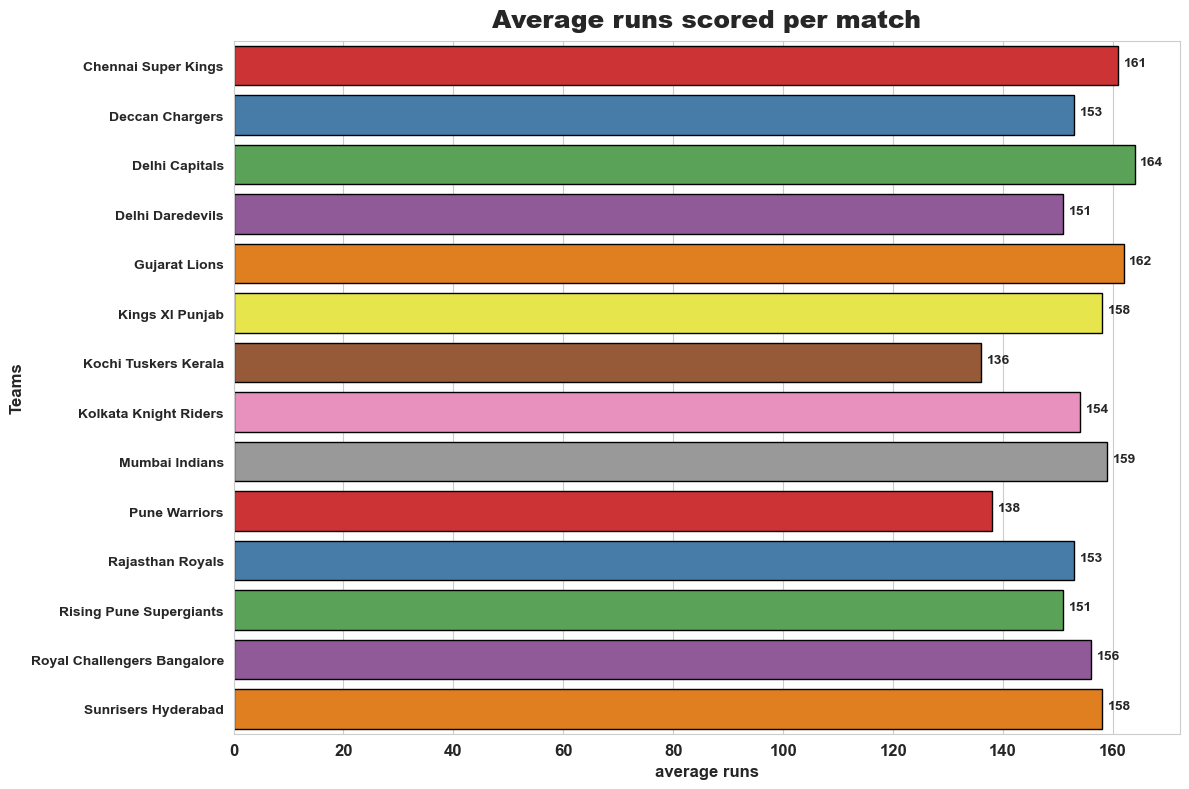

In [22]:
#plot
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
n=deliveries["batting_team"].nunique()
colors=sns.color_palette("Set1",n_colors=n)
sns.barplot(x="average",y="batting_team",data=deliveries,palette=colors,hue="batting_team",edgecolor="black")
for i in range(len(deliveries["batting_team"])):
    plt.text(deliveries["average"].iloc[i]+1,i,f"{deliveries['average'].iloc[i]}",fontsize=10,fontweight=700)
plt.title("Average runs scored per match",fontsize=18,fontweight=800,pad=10)
plt.xlabel("average runs",fontweight="bold",fontsize=12)
plt.ylabel("Teams",fontweight="bold",fontsize=12)
plt.xticks(fontweight="bold",fontsize=12)
plt.yticks(fontweight="bold")
plt.tight_layout()
plt.savefig("plots/avg_run_per_match.jpg",dpi=300)
plt.show()




### Total matches per season

In [23]:
season=pd.read_csv("R:\projects\IPL-DATA-ANALYSIS\Data\matches.csv",usecols=["Season","team1","team2"])

In [24]:
season


,Season,team1,team2
0,IPL-2017,Sunrisers Hyderabad,Royal Challengers Bangalore
1,IPL-2017,Mumbai Indians,Rising Pune Supergiant
2,IPL-2017,Gujarat Lions,Kolkata Knight Riders
3,IPL-2017,Rising Pune Supergiant,Kings XI Punjab
4,IPL-2017,Royal Challengers Bangalore,Delhi Daredevils
...,...,...,...
751,IPL-2019,Kolkata Knight Riders,Mumbai Indians
752,IPL-2019,Chennai Super Kings,Mumbai Indians
753,IPL-2019,Sunrisers Hyderabad,Delhi Capitals
754,IPL-2019,Delhi Capitals,Chennai Super Kings


In [25]:
df=pd.concat([
    season[["Season","team1"]].rename(columns={"team1":"team"}),
             season[["Season","team2"]].rename(columns={"team2":"team"})
])

In [26]:
df

,Season,team
0,IPL-2017,Sunrisers Hyderabad
1,IPL-2017,Mumbai Indians
2,IPL-2017,Gujarat Lions
3,IPL-2017,Rising Pune Supergiant
4,IPL-2017,Royal Challengers Bangalore
...,...,...
751,IPL-2019,Mumbai Indians
752,IPL-2019,Mumbai Indians
753,IPL-2019,Delhi Capitals
754,IPL-2019,Chennai Super Kings


In [27]:
df=df.groupby(["Season","team"])["team"].count().reset_index(name='matches')

In [28]:
df

,Season,team,matches
0,IPL-2008,Chennai Super Kings,16
1,IPL-2008,Deccan Chargers,14
2,IPL-2008,Delhi Daredevils,14
3,IPL-2008,Kings XI Punjab,15
4,IPL-2008,Kolkata Knight Riders,13
...,...,...,...
95,IPL-2019,Kolkata Knight Riders,14
96,IPL-2019,Mumbai Indians,16
97,IPL-2019,Rajasthan Royals,14
98,IPL-2019,Royal Challengers Bangalore,14


In [29]:
df=pd.pivot_table(index="team",columns="Season",values="matches",data=df).fillna(0).astype(int)


In [30]:
df

Season,IPL-2008,IPL-2009,IPL-2010,IPL-2011,IPL-2012,IPL-2013,IPL-2014,IPL-2015,IPL-2016,IPL-2017,IPL-2018,IPL-2019
team,,,,,,,,,,,,
Chennai Super Kings,16,14,16,16,18,18,16,17,0,0,16,17
Deccan Chargers,14,16,16,14,15,0,0,0,0,0,0,0
Delhi Capitals,0,0,0,0,0,0,0,0,0,0,0,16
Delhi Daredevils,14,15,14,14,18,16,14,14,14,14,14,0
Gujarat Lions,0,0,0,0,0,0,0,0,16,14,0,0
Kings XI Punjab,15,14,14,14,16,16,17,14,14,14,14,14
Kochi Tuskers Kerala,0,0,0,14,0,0,0,0,0,0,0,0
Kolkata Knight Riders,13,13,14,15,17,16,16,13,15,16,16,14
Mumbai Indians,14,13,16,16,17,19,15,16,14,17,14,16


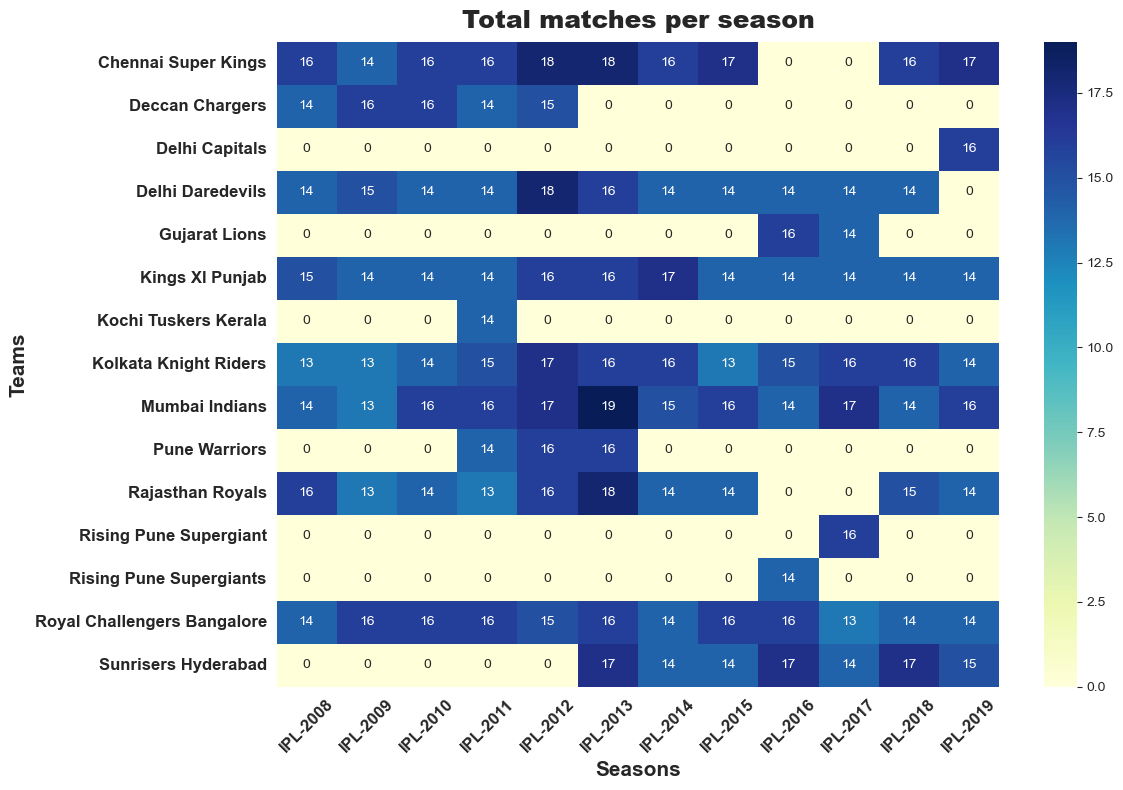

In [31]:
#plotting
plt.figure(figsize=(12,8))
sns.heatmap(df,annot=True,fmt="d",cmap="YlGnBu")
plt.title("Total matches per season",fontsize=18,fontweight=800,pad=10)
plt.xlabel("Seasons",fontsize=15,fontweight=600)
plt.ylabel("Teams",fontsize=15,fontweight=600)
plt.xticks(fontsize=12,fontweight=600,rotation=45)
plt.yticks(fontsize=12,fontweight=600)
plt.tight_layout()
plt.savefig("plots/total_matches_per_season.jpg",dpi=300)
plt.show()


### Highest and lowest team scores

In [32]:
df=pd.read_csv("R:\projects\IPL-DATA-ANALYSIS\Data\deliveries.csv",usecols=["match_id","batting_team","total_runs"])

In [33]:
df.isnull().sum()

match_id        0
batting_team    0
total_runs      0
dtype: int64

In [34]:
df=df.replace({"Rising Pune Supergiant":"Rising Pune Supergiants"})
df

,match_id,batting_team,total_runs
0,1,Sunrisers Hyderabad,0
1,1,Sunrisers Hyderabad,0
2,1,Sunrisers Hyderabad,4
3,1,Sunrisers Hyderabad,0
4,1,Sunrisers Hyderabad,2
...,...,...,...
179073,11415,Chennai Super Kings,1
179074,11415,Chennai Super Kings,2
179075,11415,Chennai Super Kings,1
179076,11415,Chennai Super Kings,2


In [35]:
data=df.groupby(["match_id","batting_team"])["total_runs"].sum().reset_index(name='runs')

In [36]:
data

,match_id,batting_team,runs
0,1,Royal Challengers Bangalore,172
1,1,Sunrisers Hyderabad,207
2,2,Mumbai Indians,184
3,2,Rising Pune Supergiants,187
4,3,Gujarat Lions,183
...,...,...,...
1505,11413,Sunrisers Hyderabad,171
1506,11414,Chennai Super Kings,162
1507,11414,Delhi Capitals,155
1508,11415,Chennai Super Kings,157


In [37]:
maximum=data.groupby("batting_team")["runs"].max().reset_index(name="max_score")

In [38]:
maximum

,batting_team,max_score
0,Chennai Super Kings,246
1,Deccan Chargers,214
2,Delhi Capitals,219
3,Delhi Daredevils,231
4,Gujarat Lions,208
5,Kings XI Punjab,232
6,Kochi Tuskers Kerala,184
7,Kolkata Knight Riders,250
8,Mumbai Indians,230
9,Pune Warriors,192


In [39]:
minimum=data.groupby("batting_team")["runs"].min().reset_index(name="min_score")

In [40]:
minimum

,batting_team,min_score
0,Chennai Super Kings,55
1,Deccan Chargers,82
2,Delhi Capitals,99
3,Delhi Daredevils,56
4,Gujarat Lions,104
5,Kings XI Punjab,68
6,Kochi Tuskers Kerala,74
7,Kolkata Knight Riders,48
8,Mumbai Indians,68
9,Pune Warriors,99


In [41]:
minimum["min_score"].iat[12]=49

In [42]:
minimum


,batting_team,min_score
0,Chennai Super Kings,55
1,Deccan Chargers,82
2,Delhi Capitals,99
3,Delhi Daredevils,56
4,Gujarat Lions,104
5,Kings XI Punjab,68
6,Kochi Tuskers Kerala,74
7,Kolkata Knight Riders,48
8,Mumbai Indians,68
9,Pune Warriors,99


In [43]:
df=pd.merge(minimum[["batting_team", "min_score"]], 
         maximum[["batting_team", "max_score"]], 
         how="outer", 
         on="batting_team")

In [44]:
df

,batting_team,min_score,max_score
0,Chennai Super Kings,55,246
1,Deccan Chargers,82,214
2,Delhi Capitals,99,219
3,Delhi Daredevils,56,231
4,Gujarat Lions,104,208
5,Kings XI Punjab,68,232
6,Kochi Tuskers Kerala,74,184
7,Kolkata Knight Riders,48,250
8,Mumbai Indians,68,230
9,Pune Warriors,99,192


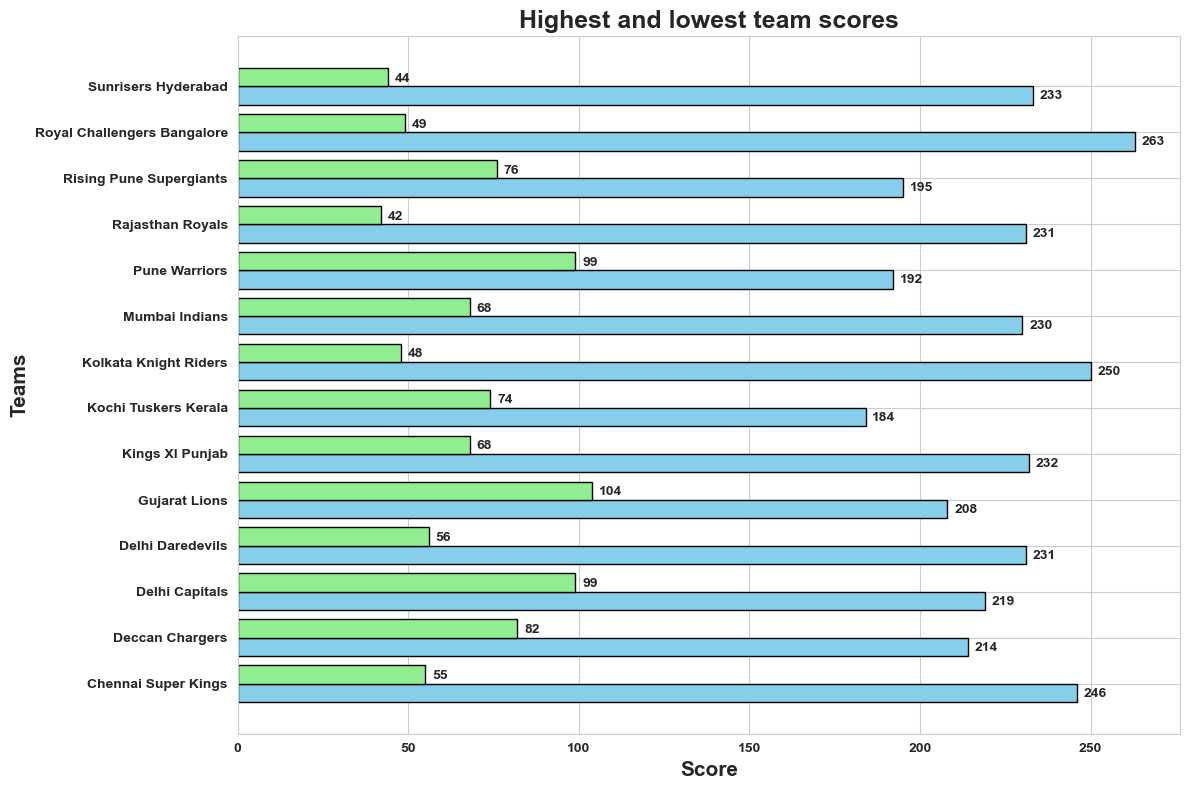

In [45]:
# plotting

plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
y_pos=np.arange(0,len(df["batting_team"]))
width=0.4
plt.barh(y=y_pos - width/2, width=df["max_score"], height=0.4, label="Max Score", color='skyblue',edgecolor="black")
for i in range(len(y_pos)):
    plt.text(df["max_score"].iloc[i]+2,i-0.28,f"{df['max_score'].iloc[i]}",fontweight=700)

plt.barh(y=y_pos + width/2, width=df["min_score"], height=0.4, label="Min Score", color='lightgreen',edgecolor="black")
for i in range(len(y_pos)):
    plt.text(df["min_score"].iloc[i]+2,i+0.1,f"{df['min_score'].iloc[i]}",fontweight=700)

plt.title("Highest and lowest team scores",fontsize=18,fontweight=600)
plt.xlabel("Score",fontsize=15,fontweight=600)
plt.ylabel("Teams",fontsize=15,fontweight=600)
plt.yticks(y_pos,df["batting_team"],fontweight=600)
plt.xticks(fontweight=600)
plt.tight_layout()
plt.savefig("plots/high_low_score.jpg",dpi=300)
plt.show()


### Super over matches percentage

In [46]:
result=pd.read_csv("R:\projects\IPL-DATA-ANALYSIS\Data\matches.csv",usecols=["result"])

In [47]:
result.isnull().sum()

result    0
dtype: int64

In [48]:
result.shape

(756, 1)

In [49]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   result  756 non-null    object
dtypes: object(1)
memory usage: 6.0+ KB


In [50]:
result.describe()

,result
count,756
unique,3
top,normal
freq,743


In [51]:
result.head()

,result
0,normal
1,normal
2,normal
3,normal
4,normal


In [52]:
result=result.groupby("result")["result"].count().reset_index(name='matches')

In [53]:
result=result.replace({"tie":"super_over"})
result

,result,matches
0,no result,4
1,normal,743
2,super_over,9


In [54]:
result["avg"]=((result["matches"]/result["matches"].sum())*100).round(2)

In [55]:
result

,result,matches,avg
0,no result,4,0.53
1,normal,743,98.28
2,super_over,9,1.19


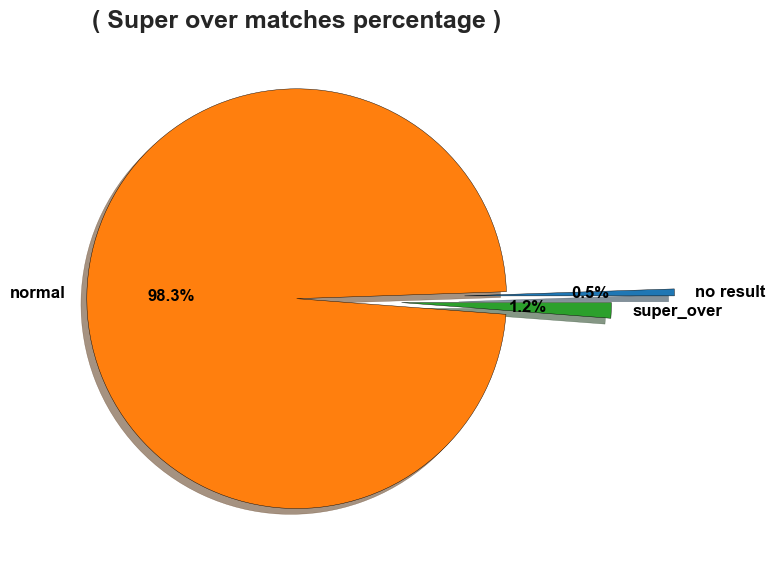

In [56]:
#plotting


plt.figure(figsize=(8,8))
plt.style.use('seaborn-v0_8-notebook')
sizes=result["matches"]
explode=[0.8,0,0.5]
def auto_pct(pct):
    return f"{pct:.1f}%"


plt.pie(sizes,labels=result["result"],explode=explode,autopct=auto_pct,shadow=True,wedgeprops={"edgecolor":"black"},textprops=dict(color="black", fontsize=12, fontweight='bold'))
plt.title("( Super over matches percentage )",fontsize=18,fontweight=600)
plt.tight_layout()
plt.savefig("plots/Super_over.jpg",dpi=300)



### Venues with highest win % for specific teams



In [57]:
df=pd.read_csv("R:\projects\IPL-DATA-ANALYSIS\Data\matches.csv",usecols=["team1","team2","venue","winner"])

In [58]:
df

,team1,team2,winner,venue
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal"
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,Maharashtra Cricket Association Stadium
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,Saurashtra Cricket Association Stadium
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,Holkar Cricket Stadium
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,M Chinnaswamy Stadium
...,...,...,...,...
751,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,Wankhede Stadium
752,Chennai Super Kings,Mumbai Indians,Mumbai Indians,M. A. Chidambaram Stadium
753,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,ACA-VDCA Stadium
754,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,ACA-VDCA Stadium


In [59]:
df.isnull().sum()

team1     0
team2     0
winner    4
venue     0
dtype: int64

In [60]:
df.dropna(inplace=True)

In [61]:
df.isnull().sum()

team1     0
team2     0
winner    0
venue     0
dtype: int64

In [62]:
df=df.replace({"Rising Pune Supergiant":"Rising Pune Supergiants"})

In [63]:
df

,team1,team2,winner,venue
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal"
1,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,Maharashtra Cricket Association Stadium
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,Saurashtra Cricket Association Stadium
3,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,Holkar Cricket Stadium
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,M Chinnaswamy Stadium
...,...,...,...,...
751,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,Wankhede Stadium
752,Chennai Super Kings,Mumbai Indians,Mumbai Indians,M. A. Chidambaram Stadium
753,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,ACA-VDCA Stadium
754,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,ACA-VDCA Stadium


In [64]:
match_count=pd.concat([df[["venue","team1"]].rename(columns={"team1":"team"}),df[["venue","team2"]].rename(columns={"team2":"team"})])

In [65]:
match_count

,venue,team
0,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad
1,Maharashtra Cricket Association Stadium,Mumbai Indians
2,Saurashtra Cricket Association Stadium,Gujarat Lions
3,Holkar Cricket Stadium,Rising Pune Supergiants
4,M Chinnaswamy Stadium,Royal Challengers Bangalore
...,...,...
751,Wankhede Stadium,Mumbai Indians
752,M. A. Chidambaram Stadium,Mumbai Indians
753,ACA-VDCA Stadium,Delhi Capitals
754,ACA-VDCA Stadium,Chennai Super Kings


In [66]:
match_count=match_count.groupby(["venue","team"]).size().reset_index(name="matches")

In [67]:
match_count

,venue,team,matches
0,ACA-VDCA Stadium,Chennai Super Kings,1
1,ACA-VDCA Stadium,Delhi Capitals,2
2,ACA-VDCA Stadium,Sunrisers Hyderabad,1
3,Barabati Stadium,Chennai Super Kings,1
4,Barabati Stadium,Deccan Chargers,4
...,...,...,...
332,Wankhede Stadium,Pune Warriors,3
333,Wankhede Stadium,Rajasthan Royals,8
334,Wankhede Stadium,Rising Pune Supergiants,3
335,Wankhede Stadium,Royal Challengers Bangalore,10


In [68]:
winning_count=df[["winner","venue"]]

In [69]:
winning_count

,winner,venue
0,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal"
1,Rising Pune Supergiants,Maharashtra Cricket Association Stadium
2,Kolkata Knight Riders,Saurashtra Cricket Association Stadium
3,Kings XI Punjab,Holkar Cricket Stadium
4,Royal Challengers Bangalore,M Chinnaswamy Stadium
...,...,...
751,Mumbai Indians,Wankhede Stadium
752,Mumbai Indians,M. A. Chidambaram Stadium
753,Delhi Capitals,ACA-VDCA Stadium
754,Chennai Super Kings,ACA-VDCA Stadium


In [70]:
win_count=winning_count.groupby(["winner","venue"])["winner"].size().reset_index(name="win_counts")


In [71]:
win_count=win_count.rename(columns={"winner":"team"})

In [72]:
win_count.head()

,team,venue,win_counts
0,Chennai Super Kings,ACA-VDCA Stadium,1
1,Chennai Super Kings,Brabourne Stadium,1
2,Chennai Super Kings,Buffalo Park,1
3,Chennai Super Kings,De Beers Diamond Oval,1
4,Chennai Super Kings,Dr DY Patil Sports Academy,3


In [73]:
match_count.head()

,venue,team,matches
0,ACA-VDCA Stadium,Chennai Super Kings,1
1,ACA-VDCA Stadium,Delhi Capitals,2
2,ACA-VDCA Stadium,Sunrisers Hyderabad,1
3,Barabati Stadium,Chennai Super Kings,1
4,Barabati Stadium,Deccan Chargers,4


In [74]:
win_status=pd.merge(win_count,match_count,on=["venue","team"])

In [75]:
win_status["win_percentage"]=((win_status["win_counts"]/win_status["matches"])*100).round(0).astype(int)

In [76]:
win_status=win_status[win_status["matches"]>5]

In [77]:
win_status.sort_values("win_percentage",ascending=False)

,team,venue,win_counts,matches,win_percentage
16,Chennai Super Kings,Maharashtra Cricket Association Stadium,5,6,83
142,Mumbai Indians,Eden Gardens,10,13,77
14,Chennai Super Kings,M. A. Chidambaram Stadium,6,8,75
138,Mumbai Indians,Brabourne Stadium,6,8,75
202,Royal Challengers Bangalore,Feroz Shah Kotla,6,8,75
...,...,...,...,...,...
105,Kings XI Punjab,Sawai Mansingh Stadium,1,6,17
178,Rajasthan Royals,"MA Chidambaram Stadium, Chepauk",1,6,17
243,Sunrisers Hyderabad,Wankhede Stadium,1,7,14
54,Delhi Daredevils,Eden Gardens,1,8,12


In [78]:
win_status=win_status.drop_duplicates(subset=["team"])

In [79]:
win_status=win_status.reset_index(drop=True)

In [80]:
win_status

,team,venue,win_counts,matches,win_percentage
0,Chennai Super Kings,Eden Gardens,5,11,45
1,Deccan Chargers,Dr DY Patil Sports Academy,2,6,33
2,Delhi Capitals,Feroz Shah Kotla Ground,4,7,57
3,Delhi Daredevils,Eden Gardens,1,8,12
4,Gujarat Lions,Saurashtra Cricket Association Stadium,3,10,30
5,Kings XI Punjab,Eden Gardens,3,11,27
6,Kolkata Knight Riders,Eden Gardens,45,74,61
7,Mumbai Indians,Brabourne Stadium,6,8,75
8,Pune Warriors,Dr DY Patil Sports Academy,2,7,29
9,Rajasthan Royals,Eden Gardens,2,9,22


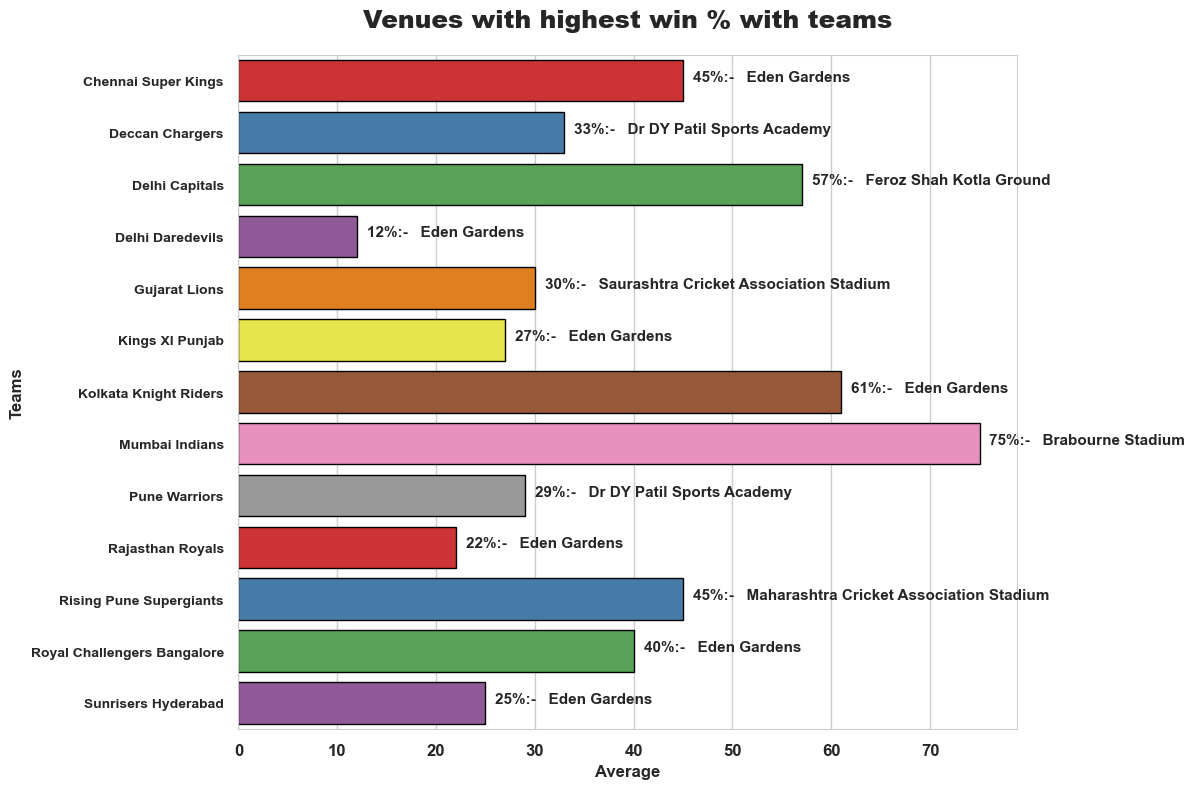

In [81]:
#plotting 

plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
colors=sns.color_palette("Set1",n_colors=len(win_status["team"]))
sns.barplot(x="win_percentage",y="team",data=win_status,palette=colors,hue="team",edgecolor="black",linewidth=1)
for i in range(len(win_status["team"])):
    plt.text(win_status["win_percentage"].iloc[i]+1,i,f"{win_status['win_percentage'].iloc[i]}%:-   {win_status['venue'].iloc[i]}",fontsize=11,fontweight=700)


plt.title("Venues with highest win % with teams",fontsize=18,fontweight=800,pad=20)
plt.xlabel("Average",fontweight="bold",fontsize=12)
plt.ylabel("Teams",fontweight="bold",fontsize=12)
plt.xticks(fontweight="bold",fontsize=12)
plt.yticks(fontweight="bold")
plt.tight_layout()

plt.savefig("plots/Venues_with_highest_win.jpg",dpi=300)
plt.show()



